### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn import preprocessing
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [29]:
# Importing Dataframes
path = r'C:\Users\franz\Documents\Exercise_6\01_Data\prepared_data\cleaned_data'
df_all = pd.read_csv(os.path.join(path, 'combined_data_6.3.csv'), usecols = all)

In [4]:
df_relevant = df_all.filter(['payment_value', 'price', 'review_score', 'product_photos_qty', 'product_description_length'], axis=1)

In [5]:
df_relevant.head()

,payment_value,price,review_score,product_photos_qty,product_description_length
0,18.12,29.99,4,4.0,268.0
1,2.00,29.99,4,4.0,268.0
2,18.59,29.99,4,4.0,268.0
3,37.77,29.99,4,4.0,268.0
4,37.77,29.99,5,4.0,268.0


# 2. Standardizing the data

In [6]:
# MinMaxScaler with parameters (set the minimun and maximum value of normalized data that we want by passing a tuple
# (min , max). By default it is (0 , 1).)
min_max_scaler = preprocessing.MinMaxScaler()

In [7]:
# we are normalizing the dataframe (df) by using fit_transform function of MinMaxScaler and making the dataframe of the 
# normalized array.
x_scaled = min_max_scaler.fit_transform(df_relevant)
df_normalized = pd.DataFrame(x_scaled)

In [8]:
df_normalized.head()

,0,1,2,3,4
0,0.001326,0.004327,0.75,0.157895,0.066199
1,0.000146,0.004327,0.75,0.157895,0.066199
2,0.001361,0.004327,0.75,0.157895,0.066199
3,0.002764,0.004327,0.75,0.157895,0.066199
4,0.002764,0.004327,1.00,0.157895,0.066199


- 0 =payment_value	
- 1 = price	
- 2 = review_score	
- 3 = product_photos_qty	
- 4 = product_description_length

In [35]:
df_all['payment_value_normalized'] = df_normalized[0]

In [37]:
df_all['price_normalized'] = df_normalized[1]

In [38]:
df_all['review_score_normalized'] = df_normalized[2]

In [43]:
df_all['product_photos_qty_normalized'] = df_normalized[3]

In [44]:
df_all['product_description_length_normalized'] = df_normalized[4]

# 3. Cleaning the data

In [9]:
# Check for missing values

df_normalized.isnull().sum()

# No missing values to handle

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [10]:
# Check for duplicate values
dups = df_normalized.duplicated()

In [11]:
dups.shape # No dups

(113216,)

C:\Users\franz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product_photos_qty', ylabel='Density'>

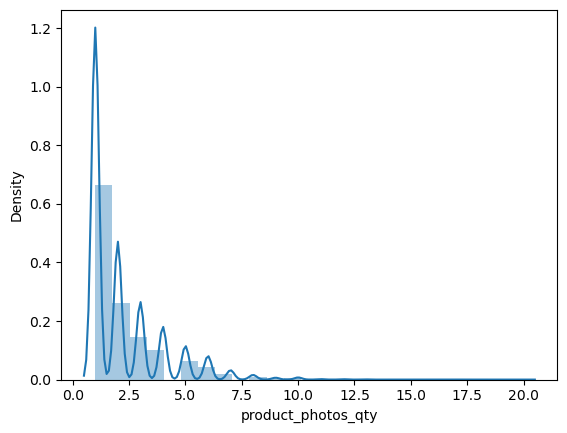

In [12]:
# Check for extreme values in product_photos_qty
sns.distplot(df_relevant['product_photos_qty'], bins=25) # Shows extreme values

# No outliers found

C:\Users\franz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product_description_length', ylabel='Density'>

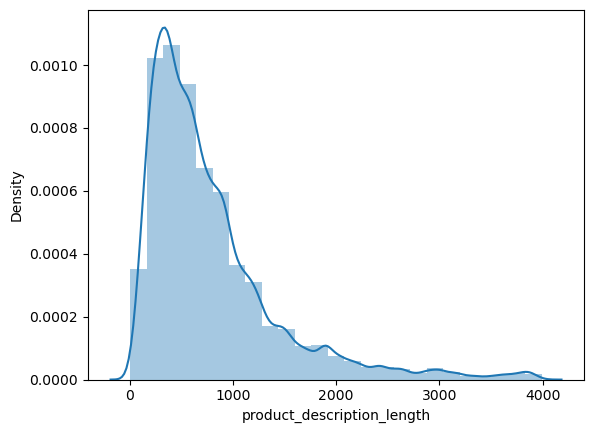

In [13]:
# Check for extreme values in product_photos_qty
sns.distplot(df_relevant['product_description_length'], bins=25) # Shows extreme values

# No outliers found

The variables review_score, price and payment_value were checked for extreme values before, thus this will not be repeated now

# 4. Elbow Technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_normalized).score(df_normalized) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-16880.287279952492,
 -6454.6012980394735,
 -4658.631503931275,
 -3214.1820674688233,
 -2806.636675897621,
 -2442.129095036198,
 -2156.377498591663,
 -1895.0344472125878,
 -1696.6525206506026]

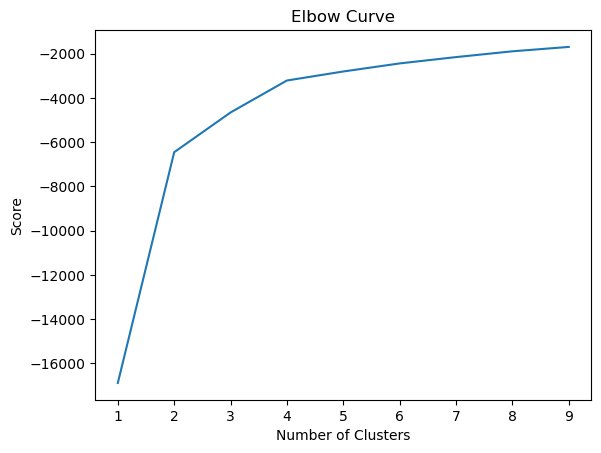

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this case, there's a large jump from one until four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

# 5. k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_normalized)

KMeans(n_clusters=4)

In [19]:
# attach a new column to your dataframe with the resulting clusters 
df_normalized['clusters'] = kmeans.fit_predict(df_normalized)

In [30]:
df_all['clusters'] = df_normalized['clusters']

In [31]:
df_all.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_in_days,...,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,clusters
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,15,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,2
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,15,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,2
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,15,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,2
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/2017 18:29,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,12,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,2
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/2017 18:24,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,12,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,0


In [20]:
df_normalized.head()

,0,1,2,3,4,clusters
0,0.001326,0.004327,0.75,0.157895,0.066199,2
1,0.000146,0.004327,0.75,0.157895,0.066199,2
2,0.001361,0.004327,0.75,0.157895,0.066199,2
3,0.002764,0.004327,0.75,0.157895,0.066199,2
4,0.002764,0.004327,1.00,0.157895,0.066199,0


In [21]:
df_normalized['clusters'].value_counts()

0    56870
2    28648
1    16704
3    10994
Name: clusters, dtype: int64

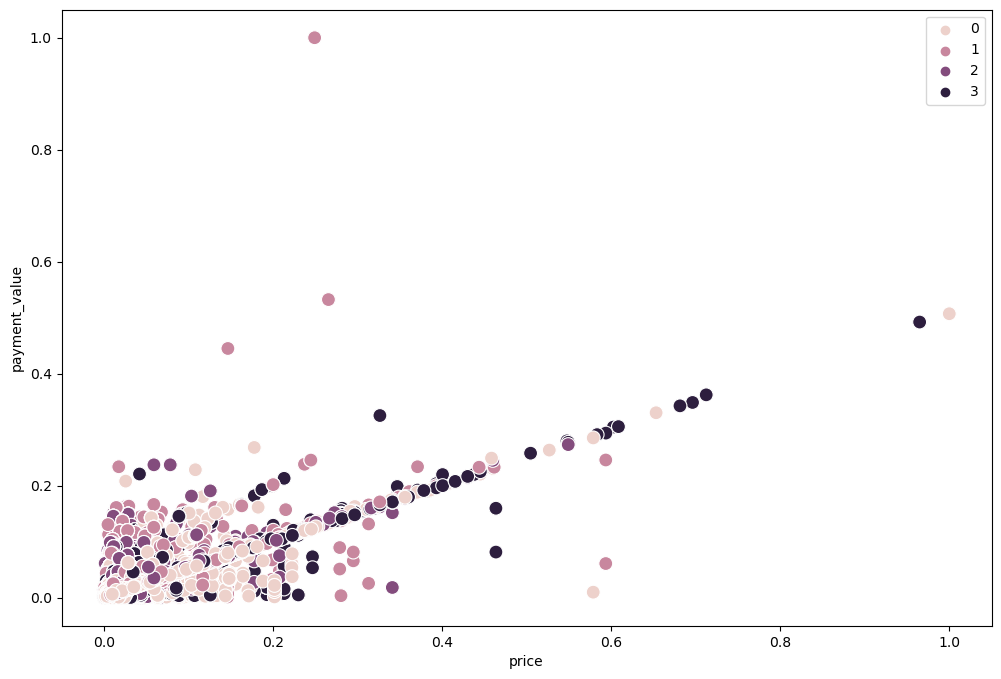

In [42]:
# Plot the clusters for the "price" and "payment_value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_normalized[1], y=df_normalized[0], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price') # Label x-axis.
plt.ylabel('payment_value') # Label y-axis.
plt.show()

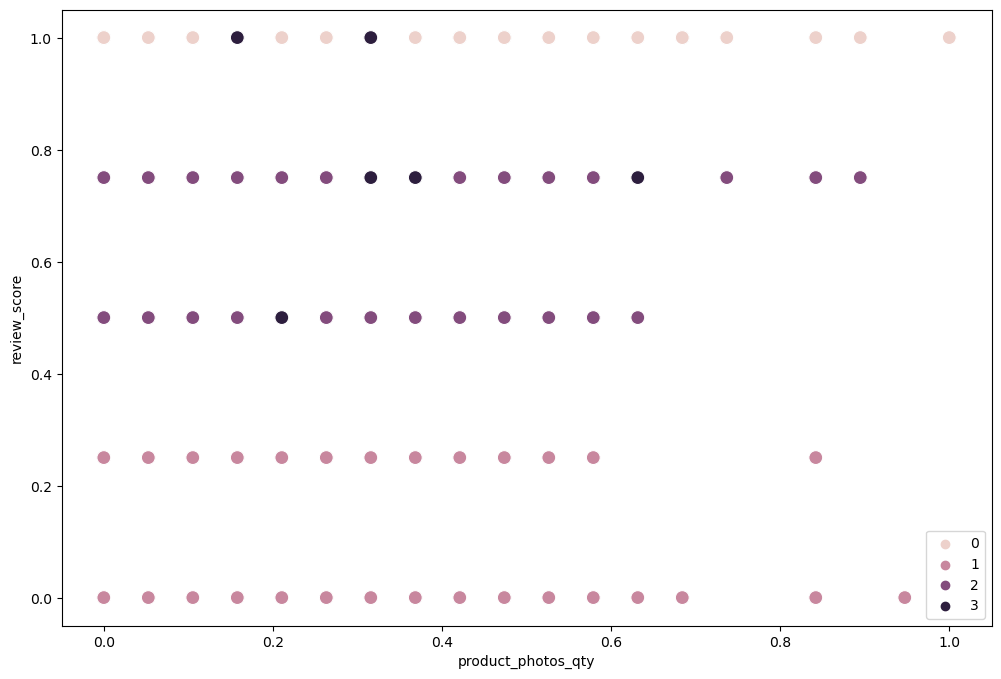

In [22]:
# Plot the clusters for the "price" and "payment_value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_normalized[3], y=df_normalized[2], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('product_photos_qty') # Label x-axis.
plt.ylabel('review_score') # Label y-axis.
plt.show()

##### The first cluster, in light orange (coded as “0” in the legend), is also the cluster with the best review scores and highest amounts of product pictures. The second cluster, in pink (coded as “1” in the legend), includes points with the worst review scores, and also the lowest amounts of product pictures (with the exclusion of some extreme values at the top of the product-photos-qty range). In medium-purple (coded as "2" in the legend), we have a third cluster that contain points with a review score lower than the first cluster, but higher on average than the second cluster. The same logic applies to the amount of product photos of this cluster. In the fourth cluster, the review scores are in the upper half and the number of images in the lower half. The fourth cluster is rather an exception. 

##### Based on the first three clusters, it can be determined that the number of pictures provided has a direct influence on the customer ratings. The assumption is that the customer with several photos has a better idea of the product, and since he knows better what to expect, he is less likely to be negatively surprised.

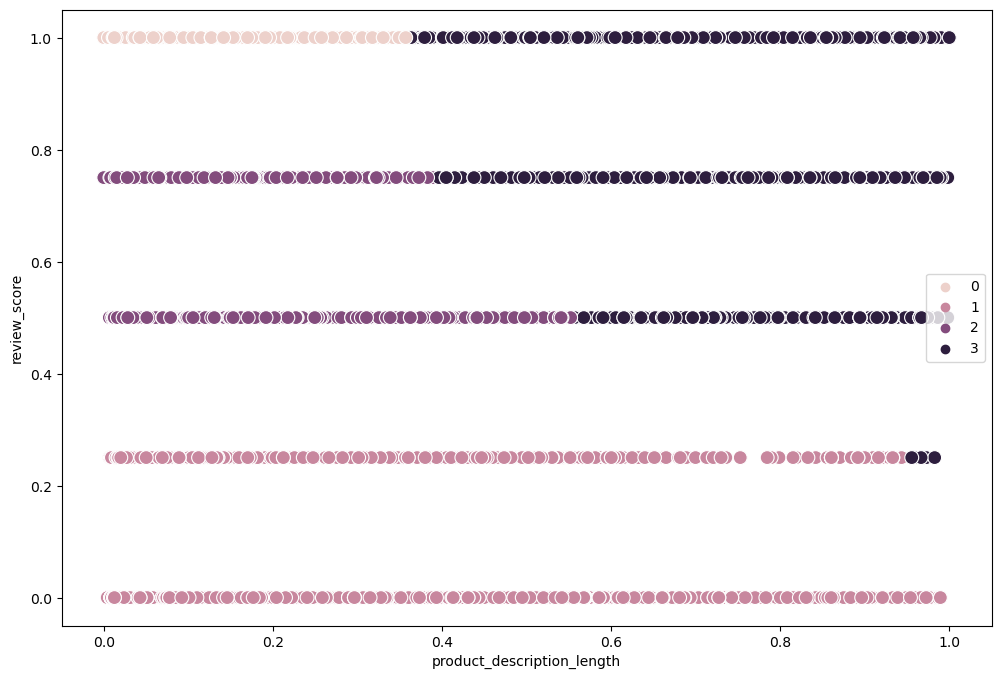

In [23]:
# Plot the clusters for the "price" and "payment_value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_normalized[4], y=df_normalized[2], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('product_description_length') # Label x-axis.
plt.ylabel('review_score') # Label y-axis.
plt.show()

##### The first cluster in light orange (labelled "0") describes the best review scores for rather shorter product descriptions, the length is in the lower third. The same description length applies for the fourth cluster (labelled "3"), but here the ratings are in the upper midfield (though not at the top either). The third cluster (labelled "2") describes the longer product descriptions with review scores in the upper midfield to top ratings. The worst review scores contain any description lenghts. 

##### Overall, there must be other influences besides the description lengths that affect the customer rating. Both long and short descriptions led to very good and very bad ratings and also to ratings in the midfield.

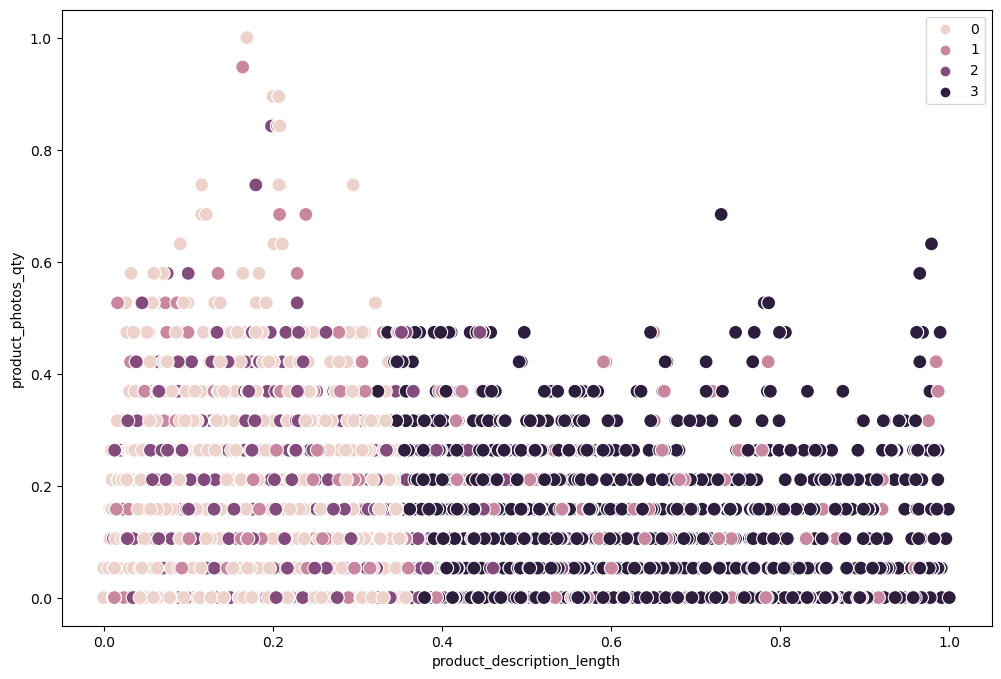

In [24]:
# Plot the clusters for the "price" and "payment_value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_normalized[4], y=df_normalized[3], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('product_description_length') # Label x-axis.
plt.ylabel('product_photos_qty') # Label y-axis.
plt.show()

##### From these clusters, a tendency becomes clear that the number of images decreases in many cases as the length of the product description increases. This becomes particularly clear in the direct comparison of the first cluster (labelled "0") and the third cluster (labelled "1"). This explains why very good review scores were achieved with both long and short product descriptions. More pictures can compensate for a short product description to keep the customer rating high.

In [25]:
df_normalized.loc[df_normalized['clusters'] == 3, 'cluster'] = 'black'
df_normalized.loc[df_normalized['clusters'] == 2, 'cluster'] = 'dark purple'
df_normalized.loc[df_normalized['clusters'] == 1, 'cluster'] = 'purple'
df_normalized.loc[df_normalized['clusters'] == 0, 'cluster'] = 'pink'

In [46]:
df_normalized.groupby('cluster').agg({0:['mean', 'median'], 
                         1:['mean', 'median'], 
                         2:['mean', 'median'], 
                         3:['mean', 'median'],
                         4:['mean', 'median']})

0                   1                   2         \
                 mean    median      mean    median      mean median   
cluster                                                                
black        0.017964  0.010494  0.029433  0.016207  0.928734   1.00   
dark purple  0.011485  0.007460  0.015812  0.010254  0.670352   0.75   
pink         0.010908  0.007311  0.016258  0.010254  1.000000   1.00   
purple       0.016450  0.009761  0.017947  0.010861  0.057381   0.00   

                    3                   4            
                 mean    median      mean    median  
cluster                                              
black        0.083203  0.052632  0.556244  0.502758  
dark purple  0.063021  0.000000  0.158483  0.138917  
pink         0.061532  0.000000  0.146682  0.132899  
purple       0.058221  0.000000  0.189583  0.143932

- 0 =payment_value	
- 1 = price	
- 2 = review_score	
- 3 = product_photos_qty	
- 4 = product_description_length

- The dark purple cluster has the best stats in almost all categories. 
- The most successfull cluster (darkest blue) in terms of return rates is the ones with the longest product descriptions and shortes delivery time. We can assume these are the most central properties.

In [45]:
#data export
df_all.to_csv(os.path.join(path, 'combined_data_6.3.csv'))